# 2 基于数据矩阵的奇异值分解算法

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [12]:
def loaddata():
    data = np.loadtxt('data/pca_data.csv', delimiter=',')
    return  data

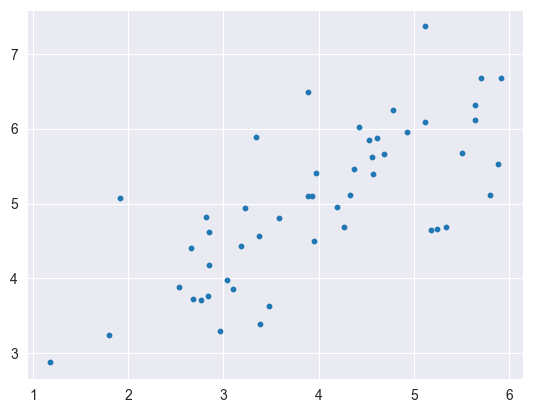

In [13]:
X = loaddata()
plt.scatter(X[:,0], X[:,1],s = 10)
plt.show()

In [14]:
def featureNormalize(X):
    mu = np.mean(X, axis = 0).reshape(1, -1)
    sigma = np.std(X, axis = 0).reshape(1, -1)
    X = (X - mu) / sigma
    return X, mu, sigma

In [15]:
def svd(X):
    U, S, V = np.linalg.svd(X, full_matrices = False)
    return U, S, V

In [16]:
def pca(X, k):
    X, mu, sigma = featureNormalize(X)
    U, S, V = svd(X)
    X_pac = np.dot(U[:,:k], np.diag(S[:k]))
    return X_pac, U, S, V

In [17]:
Z,u,s,vT = pca(X, 1)
print( Z)

[[-1.49631261]
 [ 0.92218067]
 [-1.22439232]
 [-1.64386173]
 [-1.2732206 ]
 [ 0.97681976]
 [-1.26881187]
 [ 2.34148278]
 [ 0.02999141]
 [ 0.78171789]
 [ 0.6316777 ]
 [ 0.55280135]
 [ 0.0896816 ]
 [ 0.5258541 ]
 [-1.56415455]
 [ 1.91610366]
 [ 0.88679735]
 [-0.95607375]
 [ 2.32995679]
 [ 0.47793862]
 [ 2.21747195]
 [-0.38900633]
 [ 1.78482346]
 [-0.05175486]
 [-1.66512392]
 [-0.50813572]
 [ 1.23711018]
 [ 1.17198677]
 [-0.84221686]
 [ 0.00693174]
 [ 0.22794195]
 [ 1.51309518]
 [-1.33874082]
 [ 0.5925244 ]
 [-0.67907605]
 [ 1.35298   ]
 [-1.68749495]
 [ 1.39235931]
 [-2.55992598]
 [ 0.27850702]
 [ 0.97677692]
 [-0.88820006]
 [-1.29666127]
 [ 0.98966774]
 [-1.81272352]
 [ 0.27196356]
 [-3.19297722]
 [-1.21299151]
 [-0.36792871]
 [ 1.44264131]]


In [18]:
def recoverData(Z,U,K):#恢复数据
    U_reduce = U[:,:K]
    X_rec = np.dot(Z,np.transpose(U_reduce))
    return X_rec

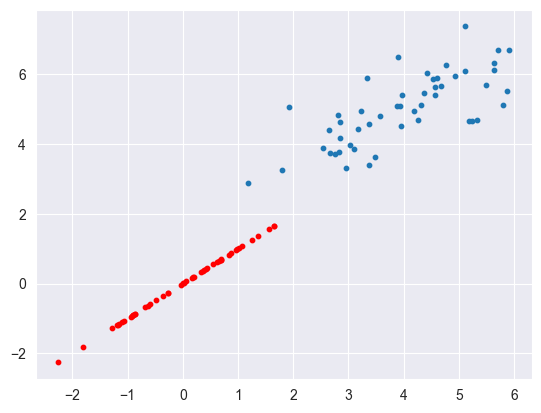

In [20]:
X_rec = recoverData(Z,vT,1)
plt.scatter(X_rec[:,0], X_rec[:,1],s = 10, c = 'r')
plt.scatter(X[:,0], X[:,1],s = 10)
plt.show()